<a href="https://colab.research.google.com/github/Praxis-QR/PythonForManagers/blob/main/Superstore_Sales_Data_Analysis_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

# Analysis of Retail Sales Data
Demonstrating the usage of basic Pandas Commands to explore Data in a relative large dataset available with [Kaggle](https://www.kaggle.com/datasets/laibaanwer/superstore-sales-dataset?resource=download)<br>
For the charts see https://pandas.pydata.org/docs/user_guide/visualization.html

In [1]:
import pandas as pd
#import matplotlib.pyplot as plt

In [11]:
dataURL = 'https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/SuperStoreSalesKaggle.zip'
dfS3K = pd.read_csv(dataURL)
dfS3K.head(1)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.14,35.46,Medium,2011


#First Look

In [12]:
#How many rows, columns
dfS3K.shape

(51290, 21)

In [6]:
#Create a list of all columns
allColumns = list(dfS3K.columns)
print(allColumns)

['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment', 'state', 'country', 'market', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'order_priority', 'year']


In [13]:
dropColumns = ['order_id',  'customer_name']
dfS3K.drop(dropColumns, axis=1, inplace= True)
dfS3K.shape

(51290, 19)

In [ ]:
#is there any missing value? In this case, not
#dfS3K.count()

In [14]:
#what are the different datatypes? 
# sales should be float64 but is object or string. Why?
dfS3K.dtypes

order_date         object
ship_date          object
ship_mode          object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [15]:
#dfS3K.sales is type object or string
dfS3K['sales'] = dfS3K['sales'].str.replace(',', '')    # replace , with blank
dfS3K['sales'] = pd.to_numeric(dfS3K['sales'])          # convert column "a" of a DataFrame
#dfS3K.sales

In [ ]:
# what is the first and last order date ?
# we have four years of data, but date format changes ...
#dfS3K['order_date'].describe

In [16]:
dfS3K['ship_date'] = pd.to_datetime(dfS3K['ship_date']).dt.strftime('%d/%m/%Y')
dfS3K['order_date'] = pd.to_datetime(dfS3K['order_date']).dt.strftime('%d/%m/%Y')
#dfS3K['order_date'].describe

## Facts and Dimensions

*   **Facts** are numeric, good for sum, mean etc
*   **Dimensions** are categorical data, good for groupby





In [17]:
# Facts -- all Numeric
Facts = ['sales','quantity','discount','profit','shipping_cost']

In [18]:
# Dimension Type I
# Cardinality - How many countries, markets, regions, segments
len(dfS3K['country'].unique()), len(dfS3K['market'].unique()), len(dfS3K['region'].unique()), len(dfS3K['segment'].unique())

(147, 7, 13, 3)

In [19]:
# Dimension Type II
# CardinalityHow many product_id, category, sub_category, product_name
len(dfS3K['product_id'].unique()), len(dfS3K['category'].unique()), len(dfS3K['sub_category'].unique()), len(dfS3K['product_name'].unique())

(10292, 3, 17, 3788)

# Market Share Calculation

## One Dimension - Groupby

### Sales, Profit by REGION 

In [20]:
# Regions with maximum sales

dfS3K.groupby('region').sum()[Facts].round(decimals = 2)
dfS3K.groupby('region').sum()[Facts].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
region,,,,,
Central,2822399,41762,1543.61,311403.98,296940.56
South,1600960,25206,990.44,140355.77,168474.07
North,1248192,18021,459.63,194597.95,131474.09
Oceania,1100207,12838,534.10,121666.64,120628.51
Southeast Asia,884438,11822,851.33,17852.33,93675.84
North Asia,848349,8851,113.90,165578.42,95030.61
EMEA,806184,11517,986.10,43897.97,88375.73
Africa,783776,10564,718.80,88871.63,88139.47
Central Asia,752839,7715,138.20,132480.19,77830.15


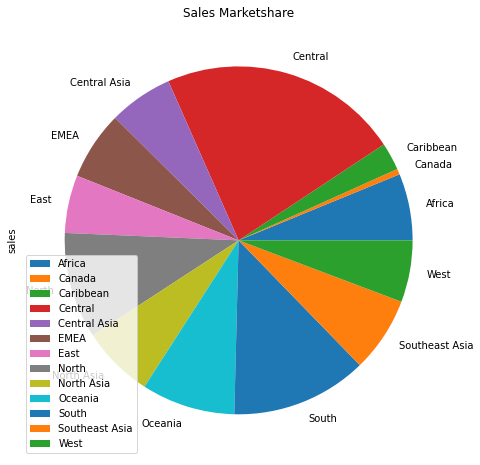

In [ ]:
# Plot a chart
dfS3K.groupby('region').sum()[Facts].plot(y = 'sales', kind='pie', figsize=(12, 8), title = 'Sales Marketshare');

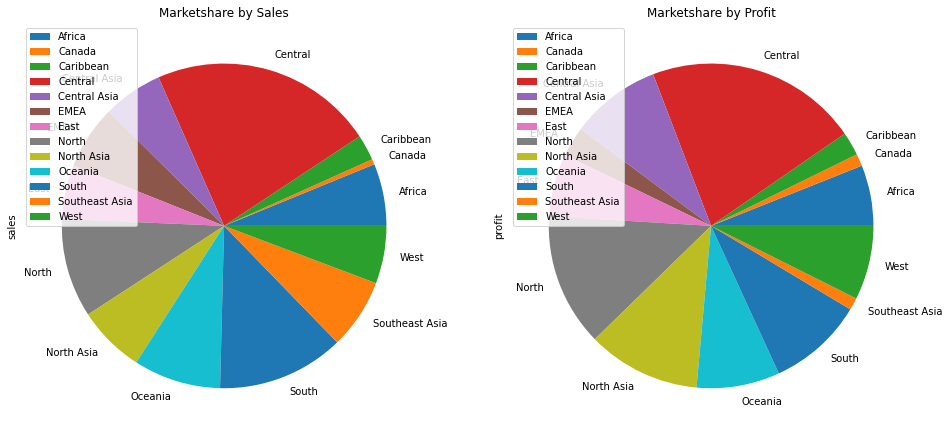

In [21]:
# Plot a chart
UsedFacts = ['sales','profit']
dfS3K.groupby('region').sum()[UsedFacts].round(decimals = 2).\
plot(subplots=True, kind='pie', figsize=(16, 8), title = ['Marketshare by Sales','Marketshare by Profit']);

### Sales, Profit by COUNTRY

In [22]:
#Countries with maximum sales
#Too many countries, so we choose the top 5 or 10

dfS3K.groupby('country').sum()[Facts].round(decimals = 2)
dfS3K.groupby('country').sum()[Facts].sort_values('sales',axis=0, ascending= False).round(decimals = 2)
dfS3K.groupby('country').sum()[Facts].sort_values('sales',axis=0, ascending= False).round(decimals = 2).head(10)

,sales,quantity,discount,profit,shipping_cost
country,,,,,
United States,2297354,37873,1561.09,286397.02,238173.79
Australia,925257,10673,407.20,105484.96,100359.02
France,858930,10804,204.35,109029.00,95387.81
China,700591,7081,26.90,150683.08,78957.02
Germany,628857,7745,117.80,107322.82,63965.18
Mexico,622620,10011,162.93,102818.10,67659.85
India,589664,5758,27.50,129071.84,61780.72
United Kingdom,528570,6161,107.30,111900.15,53580.27
Indonesia,404887,5237,413.26,15608.68,43948.62


In [24]:
Top10Countries = list(dfS3K.groupby('country').sum()[Facts].sort_values('sales',axis=0, ascending= False).head(10).index)
print(Top10Countries)

['United States', 'Australia', 'France', 'China', 'Germany', 'Mexico', 'India', 'United Kingdom', 'Indonesia', 'Brazil']


In [25]:
# Replace nonTop10Country names with OTHER
dfCopy = dfS3K.copy()
dfCopy.loc[~dfCopy['country'].isin(Top10Countries),'country'] = 'Other'

# Countries with maximum sales
#dfCopy.groupby('country').sum()[Facts].round(decimals = 2)
dfCopy.groupby('country').sum()[Facts].sort_values('sales',axis=0, ascending= False).round(decimals = 2)


,sales,quantity,discount,profit,shipping_cost
country,,,,,
Other,4725077,70821,4068.58,320628.67,510837.68
United States,2297354,37873,1561.09,286397.02,238173.79
Australia,925257,10673,407.20,105484.96,100359.02
France,858930,10804,204.35,109029.00,95387.81
China,700591,7081,26.90,150683.08,78957.02
Germany,628857,7745,117.80,107322.82,63965.18
Mexico,622620,10011,162.93,102818.10,67659.85
India,589664,5758,27.50,129071.84,61780.72
United Kingdom,528570,6161,107.30,111900.15,53580.27


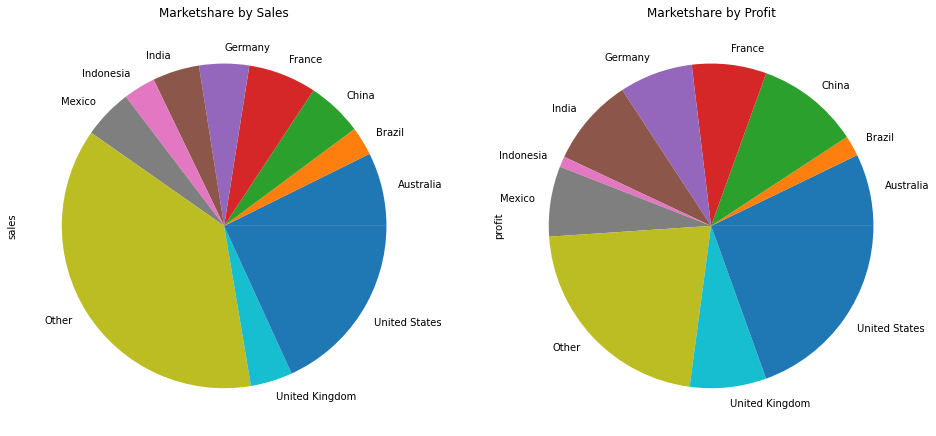

In [26]:
# Plot a chart
UsedFacts = ['sales','profit']
dfCopy.groupby('country').sum()[UsedFacts].round(decimals = 2).\
plot(subplots=True, kind='pie', figsize=(16, 8), title = ['Marketshare by Sales','Marketshare by Profit'], legend=False);

### Sales, Profit by Sub_Category

In [27]:
Top10SubCat = list(dfS3K.groupby('sub_category').sum()[Facts].sort_values('sales',axis=0, ascending= False).head(10).index)
print(Top10SubCat)

['Phones', 'Copiers', 'Chairs', 'Bookcases', 'Storage', 'Appliances', 'Machines', 'Tables', 'Accessories', 'Binders']


In [28]:
# Replace nonTop10Country names with OTHER
dfCopy = dfS3K.copy()
dfCopy.loc[~dfCopy['sub_category'].isin(Top10SubCat),'sub_category'] = 'Other'

# Countries with maximum sales
dfCopy.groupby('sub_category').sum()[Facts].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
sub_category,,,,,
Phones,1706874,11870,489.61,216717.01,184902.77
Other,1572782,74983,2724.40,242849.33,169169.18
Copiers,1509439,7454,260.42,258567.55,159496.49
Chairs,1501682,12336,560.12,141973.80,164229.85
Bookcases,1466559,8310,370.71,161924.42,155482.23
Storage,1127124,16917,700.49,108461.49,120546.46
Appliances,1011081,6078,248.70,141680.59,108300.78
Machines,779071,4906,252.00,58867.87,79135.90
Tables,757034,3083,250.32,-64083.39,79861.46


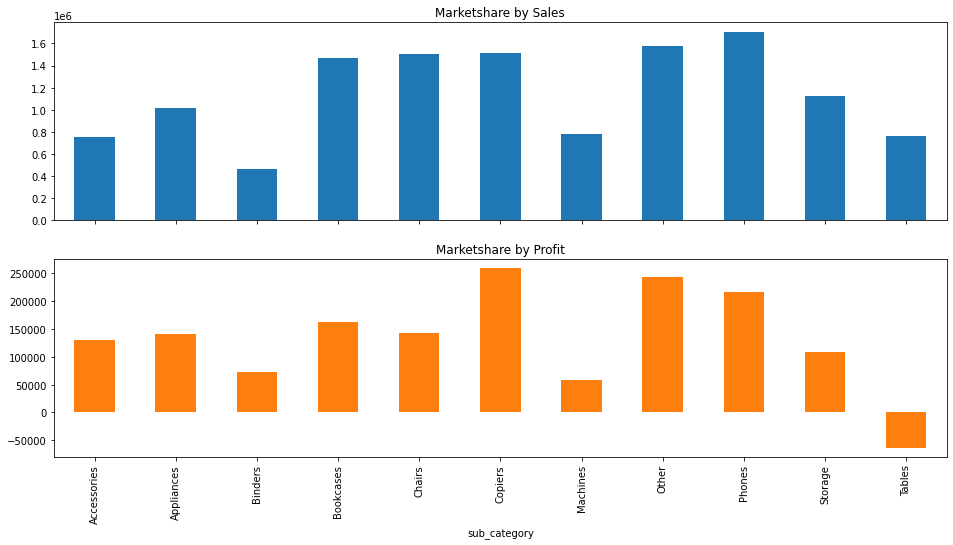

In [29]:
# Plot a chart
UsedFacts = ['sales','profit']
dfCopy.groupby('sub_category').sum()[UsedFacts].round(decimals = 2).\
plot(subplots=True, kind='bar', figsize=(16, 8), title = ['Marketshare by Sales','Marketshare by Profit'], legend=False);

#since sub_cat Tables shows a loss, a negative profit, a pie-chart cannot be drawn, hence bar chart used

### Sales, Profit by Product

In [ ]:
Top10Products = list(dfS3K.groupby('product_name').sum()[Facts].sort_values('sales',axis=0, ascending= False).head(10).index)
Top10Products

['Apple Smart Phone, Full Size',
 'Cisco Smart Phone, Full Size',
 'Motorola Smart Phone, Full Size',
 'Nokia Smart Phone, Full Size',
 'Canon imageCLASS 2200 Advanced Copier',
 'Hon Executive Leather Armchair, Adjustable',
 'Office Star Executive Leather Armchair, Adjustable',
 'Harbour Creations Executive Leather Armchair, Adjustable',
 'Samsung Smart Phone, Cordless',
 'Nokia Smart Phone, with Caller ID']

In [ ]:
# Replace nonTop10Country names with OTHER
dfCopy = dfS3K.copy()
dfCopy.loc[~dfCopy['product_name'].isin(Top10Products),'product_name'] = 'Other'

# Countries with maximum sales
dfCopy.groupby('product_name').sum()[Facts].sort_values('product_name',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
product_name,,,,,
"Samsung Smart Phone, Cordless",48654,108,3.26,-198.09,5892.09
Other,12017344,177045,7280.86,1363306.69,1291126.81
"Office Star Executive Leather Armchair, Adjustable",50667,141,6.47,4710.98,5141.74
"Nokia Smart Phone, with Caller ID",47880,96,3.54,9465.33,5321.11
"Nokia Smart Phone, Full Size",71904,147,6.79,9938.20,7852.66
"Motorola Smart Phone, Full Size",73159,134,5.61,17027.11,8817.34
"Hon Executive Leather Armchair, Adjustable",58200,169,8.11,5997.25,5751.56
"Harbour Creations Executive Leather Armchair, Adjustable",50120,142,6.98,10427.33,6548.17
"Cisco Smart Phone, Full Size",76441,139,2.07,17238.52,7065.16


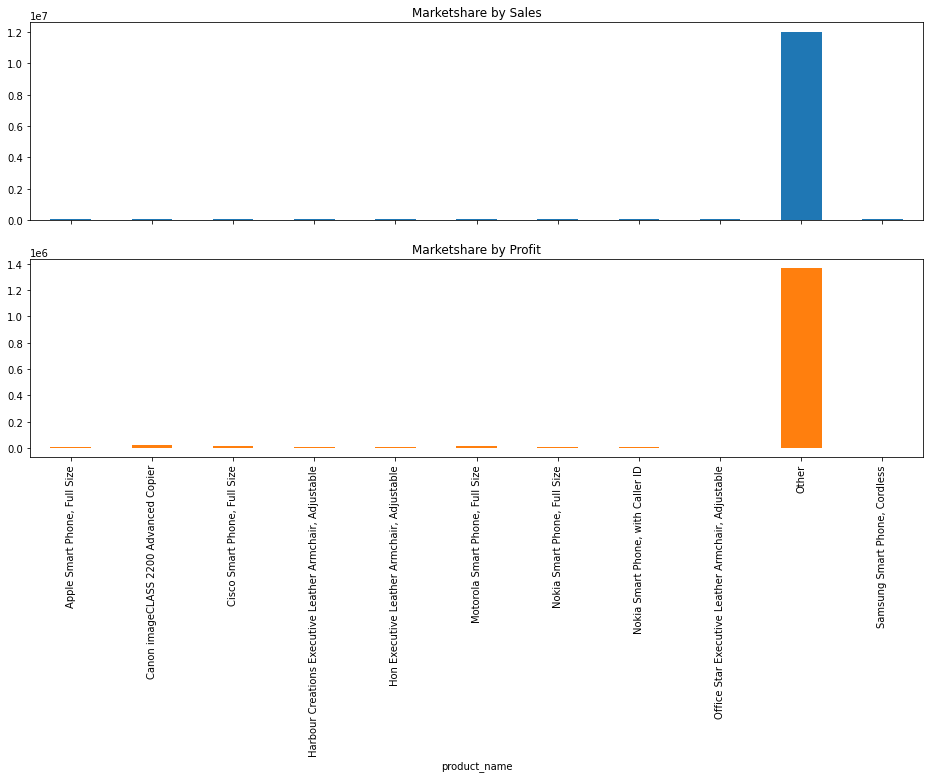

In [ ]:
# Plot a chart
UsedFacts = ['sales','profit']
dfCopy.groupby('product_name').sum()[UsedFacts].round(decimals = 2).\
plot(subplots=True, kind='bar', figsize=(16, 8), title = ['Marketshare by Sales','Marketshare by Profit'], legend=False);

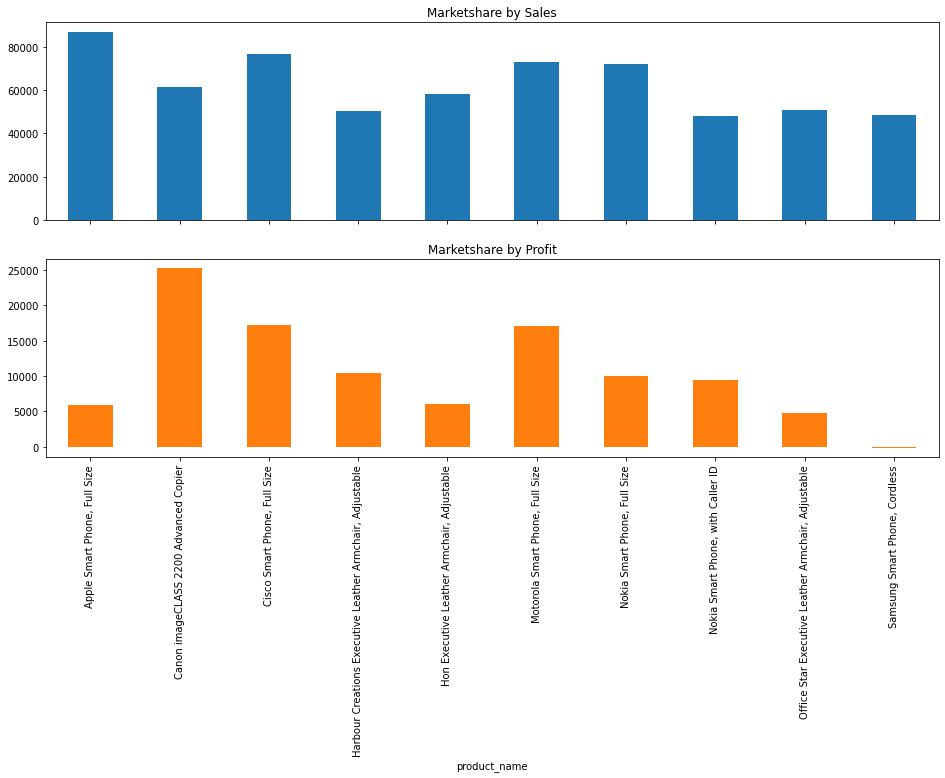

In [ ]:
# Plot a chart, excluding OTHER products
UsedFacts = ['sales','profit']
dfCopy[dfCopy['product_name'] != 'Other'].groupby('product_name').sum()[UsedFacts].round(decimals = 2).\
plot(subplots=True, kind='bar', figsize=(16, 8), title = ['Marketshare by Sales','Marketshare by Profit'], legend=False);

##Two Dimensions - Pivot Tables

###Basic Pivot

In [ ]:
pd.pivot_table(dfS3K, index = 'region', columns = 'category', values = 'sales', aggfunc = 'sum', margins = True)

category,Furniture,Office Supplies,Technology,All
region,,,,
Africa,194650,266752,322374,783776
Canada,10595,30037,26300,66932
Caribbean,118379,89565,116337,324281
Central,860413,923471,1038515,2822399
Central Asia,284369,162768,305702,752839
EMEA,228627,276712,300845,806184
East,208291,205549,264994,678834
North,377612,374778,495802,1248192
North Asia,335725,198581,314043,848349


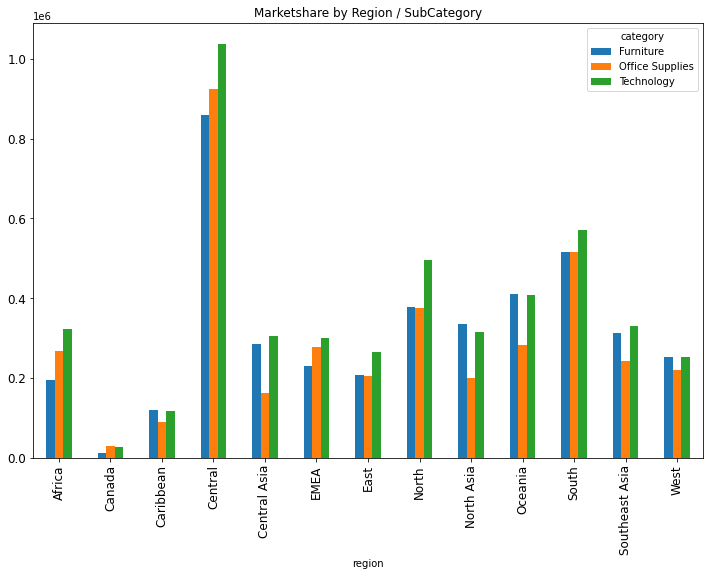

In [ ]:
pd.pivot_table(dfS3K, index = 'region', columns = 'category', values = 'sales', aggfunc = 'sum').\
plot(kind='bar',subplots=False, figsize=(12, 8), title = 'Marketshare by Region / SubCategory',fontsize=12);

In [ ]:
pd.pivot_table(dfS3K, index = 'region', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins = True)

sub_category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,All
region,,,,,,,,,,,,,,,,,,
Africa,42178,62196,38433,22308,83457,56040,96257,9687,5821,20622,4879,69109,13498,114830,96671,13259,34531,783776
Canada,4472,7941,4121,3091,5734,3202,7467,567,478,809,423,4275,1520,10086,10586,1310,850,66932
Caribbean,20294,30062,6085,8463,39363,45186,49999,6341,3344,10170,2195,5164,7183,40880,18668,7224,23660,324281
Central,174124,214856,112201,130246,315413,328569,322978,37354,18324,83305,15655,171198,51831,370215,292394,50610,133126,2822399
Central Asia,43619,55618,10827,12291,120159,90673,91403,10911,5703,22025,4517,37965,14715,132715,33636,14550,51512,752839
EMEA,44166,68268,38160,26685,91735,69821,80131,10572,6351,27740,4096,62027,10246,114521,98182,14152,39331,806184
East,45038,34191,7498,53501,43819,96263,53220,4375,821,29067,2608,66108,20174,100628,71618,10763,39142,678834
North,69283,107381,43815,31743,159661,123574,175891,22142,9980,22728,6996,70209,17010,180419,112389,23322,71649,1248192
North Asia,39296,55909,16444,14672,130070,129336,123039,13859,7299,22020,5168,48838,14194,102870,53743,17293,54299,848349


In [ ]:
#too much information
pd.pivot_table(dfS3K, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins = True)

sub_category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,All
country,,,,,,,,,,,,,,,,,,
Afghanistan,2047.0,669.0,444.0,586.0,2802.0,1331.0,1139.0,514.0,59.0,812.0,119.0,346.0,309.0,2930.0,762.0,464.0,6341.0,21674
Albania,NaN,NaN,223.0,34.0,778.0,NaN,NaN,NaN,NaN,58.0,11.0,1704.0,NaN,736.0,344.0,NaN,NaN,3888
Algeria,1237.0,3785.0,1697.0,1249.0,6130.0,1350.0,4823.0,532.0,497.0,627.0,145.0,4824.0,1965.0,2706.0,4012.0,191.0,320.0,36090
Angola,1597.0,118.0,532.0,686.0,4637.0,982.0,950.0,428.0,290.0,917.0,519.0,963.0,286.0,5141.0,5161.0,149.0,2195.0,25551
Argentina,3508.0,3041.0,1645.0,315.0,7706.0,11101.0,8516.0,1383.0,595.0,1279.0,282.0,594.0,1247.0,7895.0,3950.0,1014.0,3439.0,57510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,5742.0,8656.0,1595.0,1466.0,5906.0,11284.0,6195.0,1245.0,547.0,2335.0,626.0,1770.0,1012.0,8615.0,4609.0,1973.0,2226.0,65802
Yemen,NaN,719.0,219.0,20.0,NaN,53.0,214.0,12.0,NaN,28.0,NaN,459.0,33.0,203.0,408.0,21.0,75.0,2464
Zambia,443.0,1314.0,891.0,472.0,5452.0,1774.0,2909.0,559.0,148.0,847.0,149.0,2812.0,287.0,2134.0,3474.0,230.0,2134.0,26029


## Reduced Pivot

### Top5 Countries, Top5 Sub_Categories | SALES

In [ ]:
Top5CountriesSales = list(dfS3K.groupby('country').sum()[Facts].sort_values('sales',axis=0, ascending= False).head(5).index)
Top5SubCategoriesSales = list(dfS3K.groupby('sub_category').sum()[Facts].sort_values('sales',axis=0, ascending= False).head(5).index)
Top5CountriesSales, Top5SubCategoriesSales

(['United States', 'Australia', 'France', 'China', 'Germany'],
 ['Phones', 'Copiers', 'Chairs', 'Bookcases', 'Storage'])

In [ ]:
# Get ONLY Top5 data for both country and sub-category
dfCopy = dfS3K[dfS3K['sub_category'].isin(Top5SubCategoriesSales) & dfS3K['country'].isin(Top5CountriesSales) ]
pd.pivot_table(dfCopy, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins=True)

sub_category,Bookcases,Chairs,Copiers,Phones,Storage,All
country,,,,,,
Australia,127174,142474,138263,101706,55176,564793
China,106036,108830,109252,79329,43743,447190
France,95308,91512,95140,89966,96571,468497
Germany,69344,49817,77093,104590,72657,373501
United States,114879,328454,149530,330047,223862,1146772
All,512741,721087,569278,705638,492009,3000753


In [ ]:
# Including the notTop5 data into the pivot
dfCopy = dfS3K.copy()
dfCopy.loc[~dfCopy['country'].isin(Top5CountriesSales),'country'] = 'notTop5'
dfCopy.loc[~dfCopy['sub_category'].isin(Top5SubCategoriesSales),'sub_category'] = 'notTop5'
pd.pivot_table(dfCopy, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins=True)
#dfS3K_2['country'].unique()

sub_category,Bookcases,Chairs,Copiers,Phones,Storage,notTop5,All
country,,,,,,,
Australia,127174,142474,138263,101706,55176,360464,925257
China,106036,108830,109252,79329,43743,253401,700591
France,95308,91512,95140,89966,96571,390433,858930
Germany,69344,49817,77093,104590,72657,255356,628857
United States,114879,328454,149530,330047,223862,1150582,2297354
notTop5,953818,780595,940161,1001236,635115,2920991,7231916
All,1466559,1501682,1509439,1706874,1127124,5331227,12642905


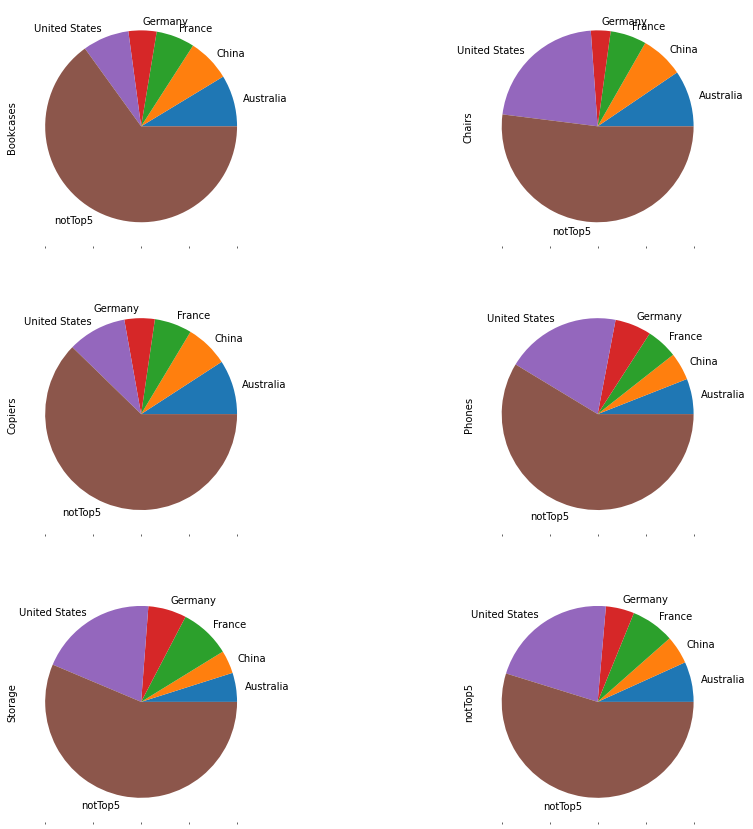

In [ ]:
pd.pivot_table(dfCopy, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum').\
plot(kind='pie',subplots=True, layout = (3,2), figsize=(15, 15), legend = False );

### Top 5 Countries, Top 5 Product_Names | SALES

In [ ]:

Top5CountriesSales = list(dfS3K.groupby('country').sum()[AllFacts].sort_values('sales',axis=0, ascending= False).head(5).index)
Top5ProductNamesSales = list(dfS3K.groupby('product_name').sum()[AllFacts].sort_values('sales',axis=0, ascending= False).head(5).index)
Top5CountriesProfit, Top5ProductNamesProfit

(['United States', 'China', 'India', 'United Kingdom', 'France'],
 ['Canon imageCLASS 2200 Advanced Copier',
  'Cisco Smart Phone, Full Size',
  'Motorola Smart Phone, Full Size',
  'Hoover Stove, Red',
  'Sauder Classic Bookcase, Traditional'])

In [ ]:
# Including the notTop5 data into the pivot
# Unfortunately this show too much empty space. Top ranking countries are not using the top ranking products
dfS3K_C2A = dfS3K.copy()
dfS3K_C2A.loc[~dfS3K_C2A['country'].isin(Top5CountriesSales),'country'] = 'notTop5'
dfS3K_C2A.loc[~dfS3K_C2A['product_name'].isin(Top5ProductNamesSales),'product_name'] = 'notTop5'
pd.pivot_table(dfS3K_C2A, index = 'product_name', columns = 'country', values = 'sales', aggfunc = 'sum', margins=True)

country,Australia,China,France,Germany,United States,notTop5,All
product_name,,,,,,,
"Apple Smart Phone, Full Size",1721.0,7013.0,7583.0,1913.0,NaN,68706.0,86936
Canon imageCLASS 2200 Advanced Copier,NaN,NaN,NaN,NaN,61600.0,NaN,61600
"Cisco Smart Phone, Full Size",3524.0,6514.0,1110.0,10432.0,NaN,54861.0,76441
"Motorola Smart Phone, Full Size",9200.0,NaN,NaN,5791.0,NaN,58168.0,73159
"Nokia Smart Phone, Full Size",2544.0,1275.0,5950.0,7317.0,NaN,54818.0,71904
notTop5,908268.0,685789.0,844287.0,603404.0,2235754.0,6995363.0,12272865
All,925257.0,700591.0,858930.0,628857.0,2297354.0,7231916.0,12642905


#80:20 Analysis

## Countries accounting for 80% profits

In [ ]:
#AllFacts = ['sales','quantity','discount','profit','shipping_cost']
#dfS3K_3 = dfS3K.copy()
dfS3K.groupby('country').sum()['profit'].round(decimals = 2)
dfS3K_C3 = dfS3K.groupby('country').sum()['profit'].sort_values(ascending= False).round().to_frame()
dfS3K_C3

,profit
country,
United States,286397.0
China,150683.0
India,129072.0
United Kingdom,111900.0
France,109029.0
...,...
Pakistan,-22447.0
Honduras,-29482.0
Netherlands,-41070.0


In [ ]:
#T = dfS3K_3.sum()['profit']
dfS3K_C3['profit_pct'] = dfS3K_C3['profit']/dfS3K_C3.sum()['profit']
dfS3K_C3

,profit,profit_pct
country,,
United States,286397.0,0.194956
China,150683.0,0.102573
India,129072.0,0.087862
United Kingdom,111900.0,0.076173
France,109029.0,0.074218
...,...,...
Pakistan,-22447.0,-0.015280
Honduras,-29482.0,-0.020069
Netherlands,-41070.0,-0.027957


In [ ]:
dfS3K_C3.cumsum()['profit_pct'].to_frame().head(10)

,profit_pct
country,
United States,0.194956
China,0.297529
India,0.385391
United Kingdom,0.461564
France,0.535782
Germany,0.608839
Australia,0.680645
Mexico,0.750636
Spain,0.787660


In [ ]:
Countries80pcProfit = list(dfS3K_C3.cumsum()['profit_pct'].to_frame().head(9).index)
Countries80pcProfit

['United States',
 'China',
 'India',
 'United Kingdom',
 'France',
 'Germany',
 'Australia',
 'Mexico',
 'Spain']

## Sub Categories accounting for 80% profit

In [ ]:
dfS3K.groupby('sub_category').sum()['profit'].round(decimals = 2)
dfS3K_C4 = dfS3K.groupby('sub_category').sum()['profit'].sort_values(ascending= False).round().to_frame()
dfS3K_C4['profit_pct'] = dfS3K_C4['profit']/dfS3K_C4.sum()['profit']
dfS3K_C4.cumsum()['profit_pct'].to_frame().head(10)

,profit_pct
sub_category,
Copiers,0.176012
Phones,0.323536
Bookcases,0.433760
Chairs,0.530405
Appliances,0.626850
Accessories,0.715088
Storage,0.788920
Binders,0.838238
Paper,0.878542


In [ ]:
SubCat80pcProfit  = list(dfS3K_C4.cumsum()['profit_pct'].to_frame().head(7).index)
SubCat80pcProfit 

['Copiers',
 'Phones',
 'Bookcases',
 'Chairs',
 'Appliances',
 'Accessories',
 'Storage']

## Reduced Data Set (80/20)

In [ ]:
dfS3K_C5 = dfS3K.copy()
dfS3K_C5.loc[~dfS3K_C5['country'].isin(Countries80pcProfit),'country'] = 'notTopProfit'
dfS3K_C5.loc[~dfS3K_C5['sub_category'].isin(SubCat80pcProfit),'sub_category'] = 'notTopProfit'
pd.pivot_table(dfS3K_C5, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins=True)
#dfS3K_2['country'].unique()

sub_category,Accessories,Appliances,Bookcases,Chairs,Copiers,Phones,Storage,notTopProfit,All
country,,,,,,,,,
Australia,55167,94172,127174,142474,138263,101706,55176,211125,925257
China,33029,42120,106036,108830,109252,79329,43743,178252,700591
France,49157,78101,95308,91512,95140,89966,96571,263175,858930
Germany,35566,41876,69344,49817,77093,104590,72657,177914,628857
India,33649,45209,88984,68875,70384,104630,27644,150289,589664
Mexico,40154,49549,77309,84389,98953,93231,41971,137064,622620
Spain,18243,35991,40481,15052,38314,34035,35728,69318,287162
United Kingdom,23618,47980,69865,26872,68430,77649,60304,153852,528570
United States,167401,107538,114879,328454,149530,330047,223862,875643,2297354


##Pie Charts

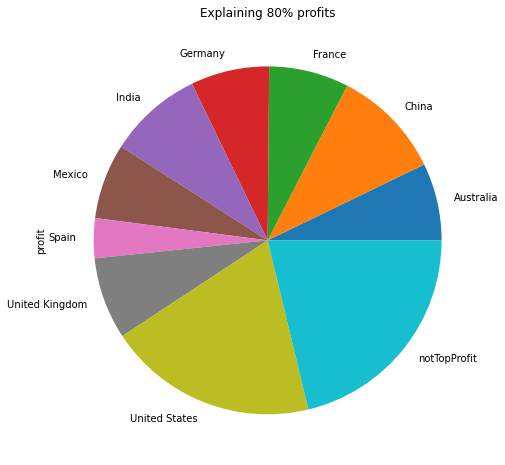

In [ ]:
dfS3K_C5.groupby('country').sum()['profit'].plot(kind='pie',figsize=(8, 8), title = 'Explaining 80% profits')

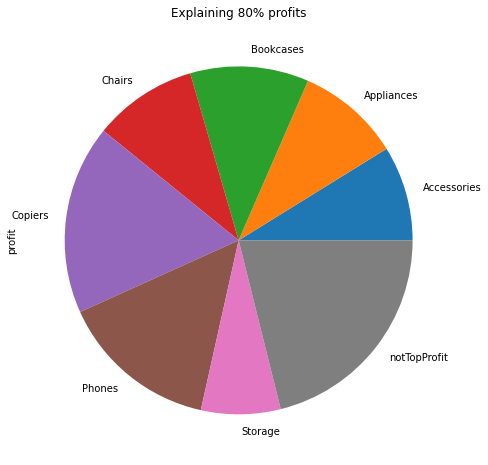

In [ ]:
dfS3K_C5.groupby('sub_category').sum()['profit'].plot(kind='pie',figsize=(8, 8), title = 'Explaining 80% profits')

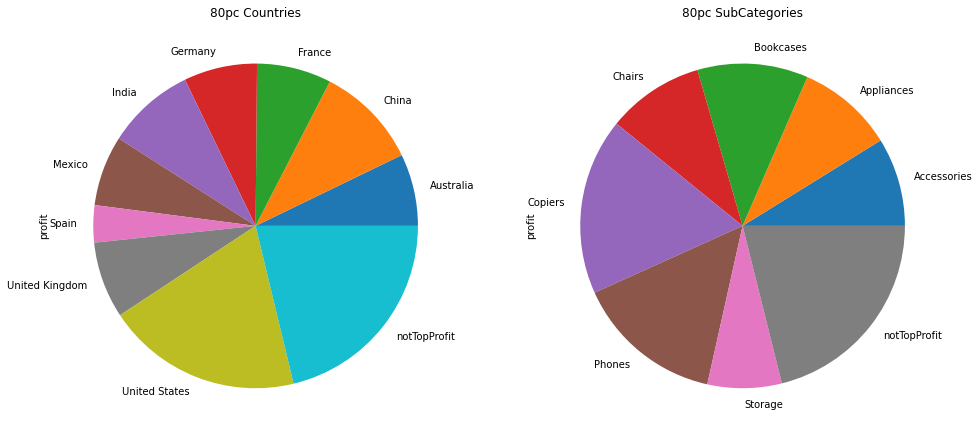

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (16,8))

dfS3K_C5.groupby('country').sum()['profit'].plot(kind='pie', title = '80pc Countries',ax=axes[0])
dfS3K_C5.groupby('sub_category').sum()['profit'].plot(kind='pie', title = '80pc SubCategories',ax=axes[1])


#Time Series

In [ ]:
dfS3K_C6 = dfS3K_C5.copy()
#list(dfS3K_C6.columns)

In [ ]:
dropColumns = ['ship_mode', 'segment', 'state', 
       'market', 'region', 'product_id', 'category', 
       'product_name', 'sales',  'discount', 'profit',
       'shipping_cost', 'order_priority']
dfS3K_C6.drop(dropColumns, axis=1, inplace= True)
dfS3K_C6.shape

(51290, 6)

In [ ]:
#year is int, better to convert to string object
dfS3K_C6.dtypes

order_date      object
ship_date       object
country         object
sub_category    object
quantity         int64
year             int64
dtype: object

In [ ]:
dfS3K_C6['year'] = dfS3K_C6['year'].astype(str)

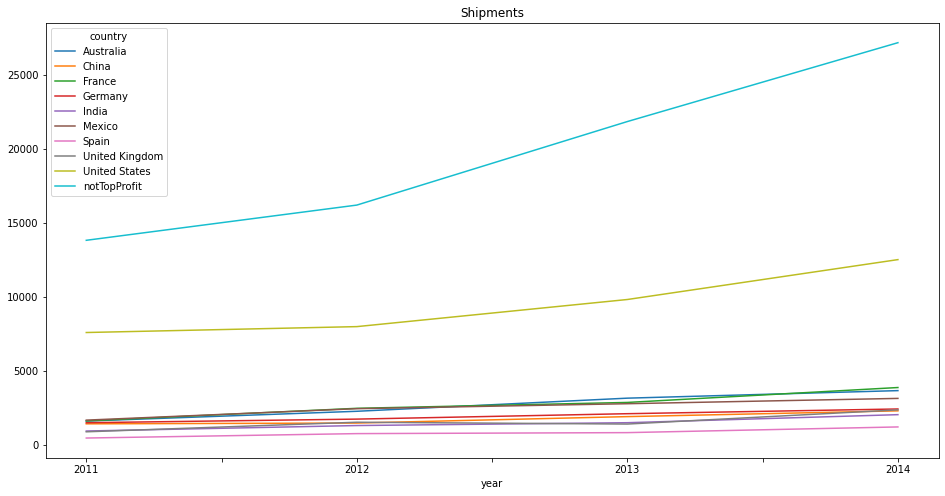

In [ ]:
pd.pivot_table(dfS3K_C6, index = 'year', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(figsize = (16,8),title = 'Shipments')

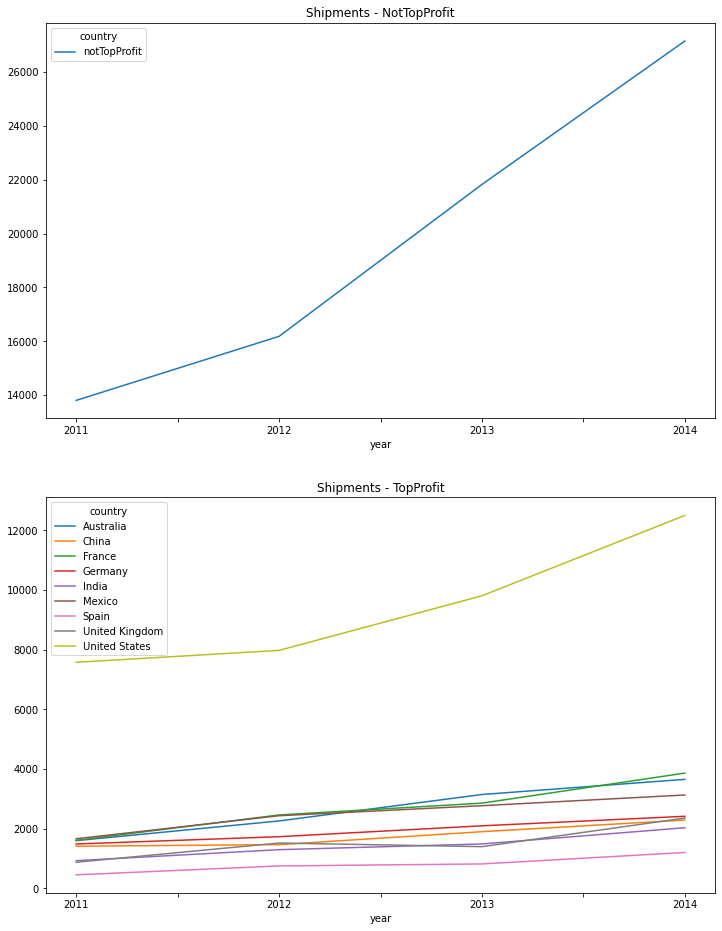

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_C6[dfS3K_C6['country'] == 'notTopProfit'], index = 'year', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(ax=axes[0],title = 'Shipments - NotTopProfit')
pd.pivot_table(dfS3K_C6[dfS3K_C6['country'] != 'notTopProfit'], index = 'year', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(ax=axes[1],title = 'Shipments - TopProfit')


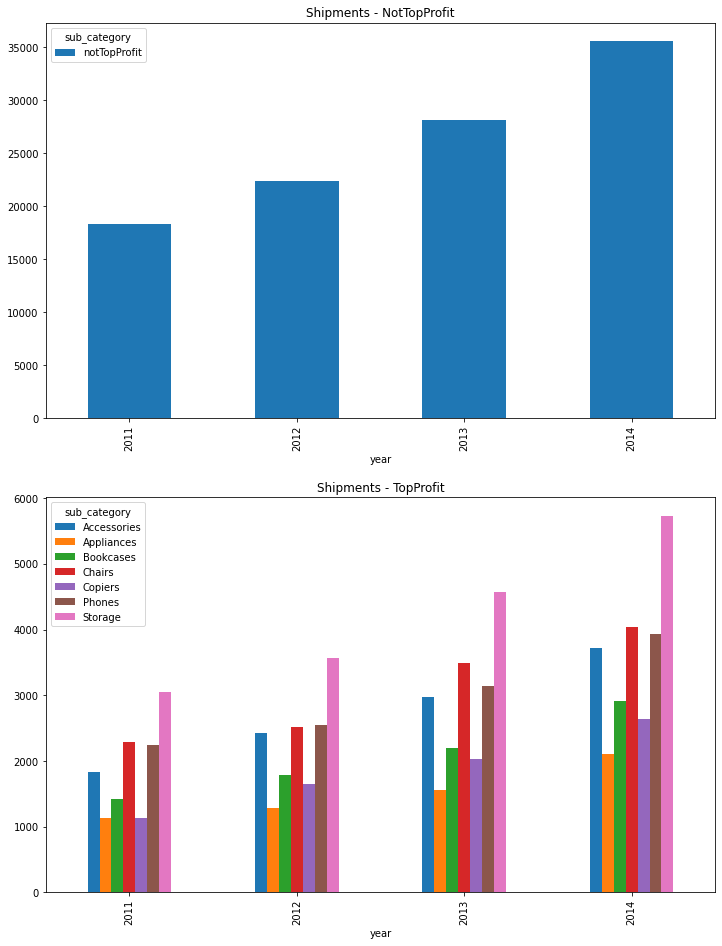

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] == 'notTopProfit'], index = 'year', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(kind = 'bar',ax=axes[0],title = 'Shipments - NotTopProfit')
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] != 'notTopProfit'], index = 'year', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(kind = 'bar',ax=axes[1],title = 'Shipments - TopProfit')


In [ ]:
dfS3K_C6['shp-yr-mon'] = pd.to_datetime(dfS3K_C6['ship_date']).dt.strftime('%Y-%m')

In [ ]:
#dfS3K_C6['shp-yr-mon'].describe

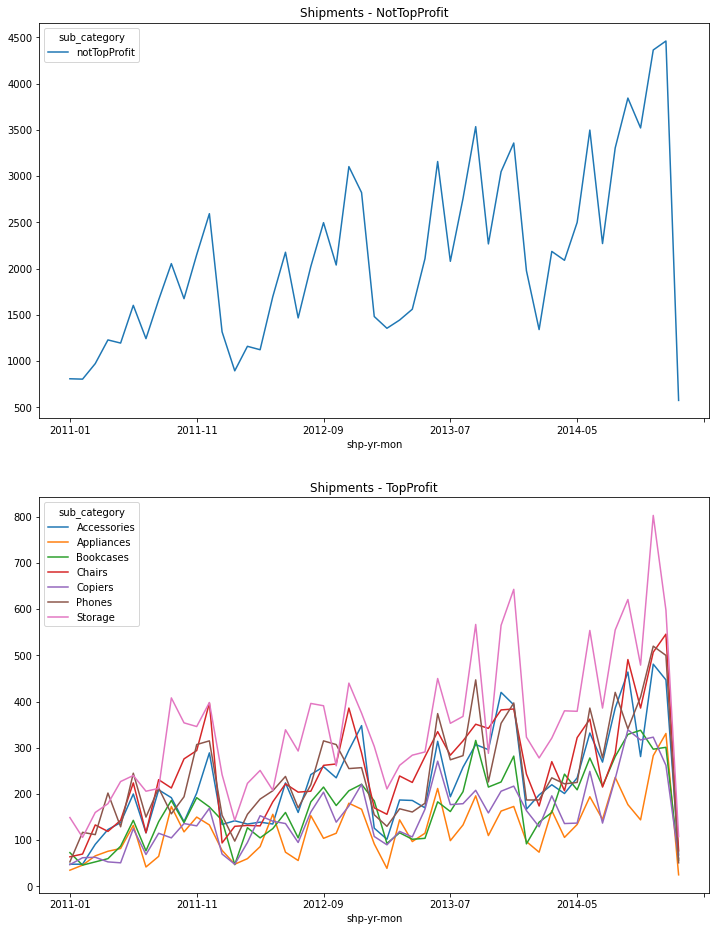

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] == 'notTopProfit'], index = 'shp-yr-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[0],title = 'Shipments - NotTopProfit')
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] != 'notTopProfit'], index = 'shp-yr-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[1],title = 'Shipments - TopProfit')


In [ ]:
dfS3K_C6['shp-mon'] = pd.to_datetime(dfS3K_C6['ship_date']).dt.strftime('%m')
#dfS3K_C6['shp-mon'].describe

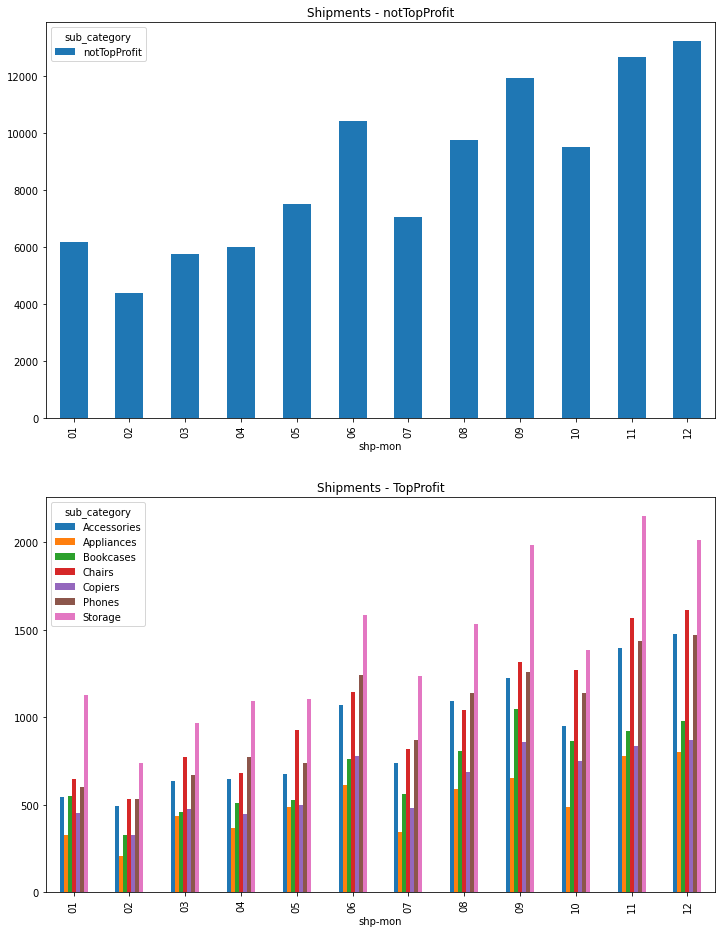

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] == 'notTopProfit'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(kind = 'bar',ax=axes[0],title = 'Shipments - notTopProfit')
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] != 'notTopProfit'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(kind = 'bar',ax=axes[1],title = 'Shipments - TopProfit')

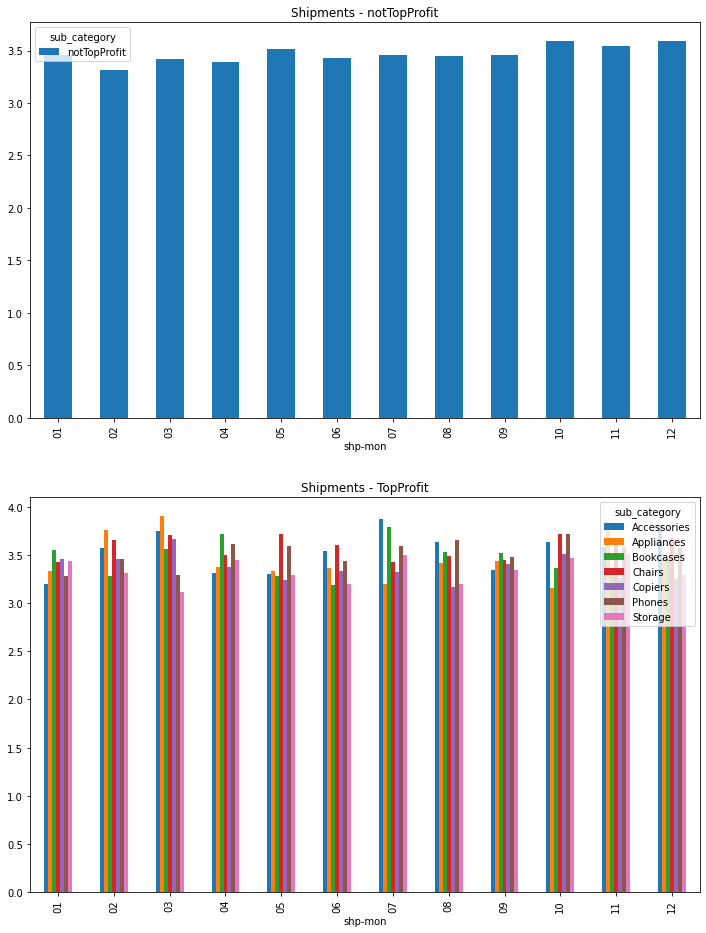

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] == 'notTopProfit'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').plot(kind = 'bar',ax=axes[0],title = 'Shipments - notTopProfit')
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] != 'notTopProfit'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').plot(kind = 'bar',ax=axes[1],title = 'Shipments - TopProfit')

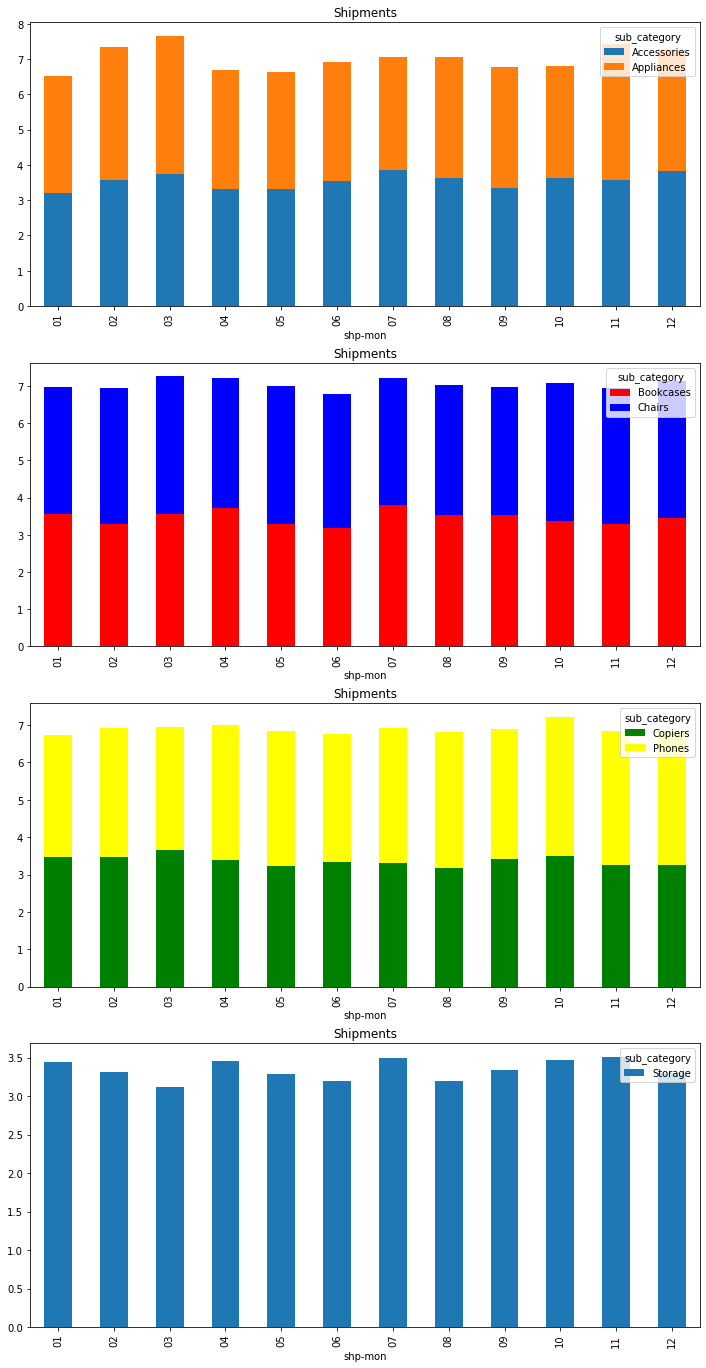

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize= (12,24))
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'].isin(['Accessories','Appliances'])], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').plot(kind= 'bar', stacked = True,ax=axes[0],title = 'Shipments')
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'].isin(['Bookcases','Chairs'])], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').plot(kind= 'bar', stacked = True,ax=axes[1],title = 'Shipments', color=['red','blue'])
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'].isin(['Copiers','Phones'])], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').plot(kind= 'bar', stacked = True,ax=axes[2],title = 'Shipments',color=['green','yellow'])
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'].isin(['Storage'])], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').plot(kind= 'bar', stacked = True,ax=axes[3],title = 'Shipments')

In [ ]:
#df['Week_Number'] = df['Date'].dt.isocalendar().week
dfS3K_C6['shp-Week'] = pd.to_datetime(dfS3K_C6['ship_date']).dt.isocalendar().week

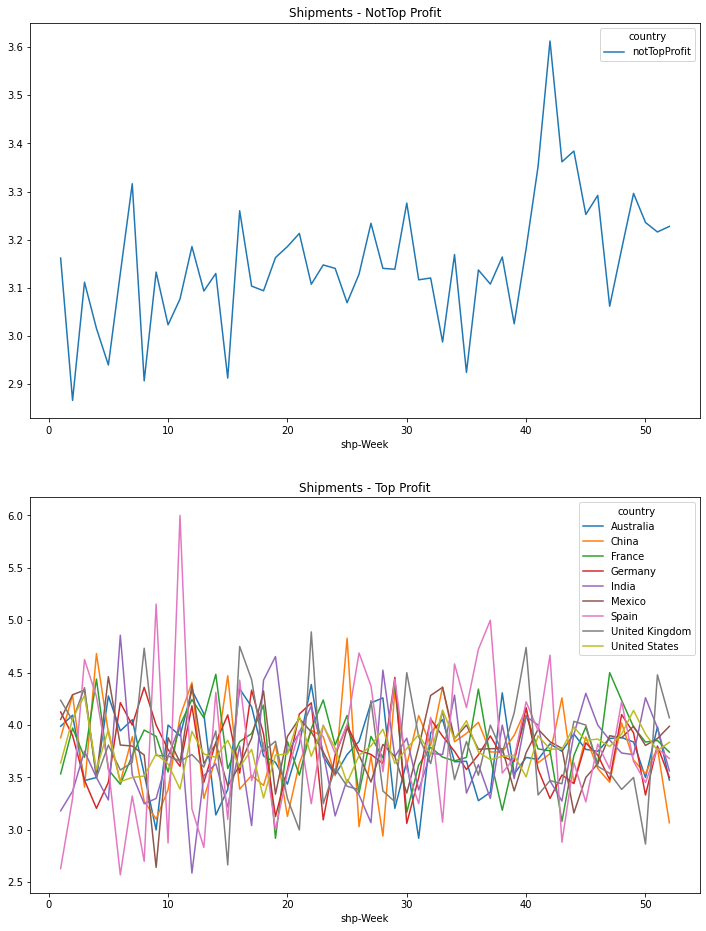

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_C6[dfS3K_C6['country'] == 'notTopProfit'], index = 'shp-Week', columns = 'country', values = 'quantity', aggfunc = 'mean').plot(ax=axes[0],title = 'Shipments - NotTop Profit')
pd.pivot_table(dfS3K_C6[dfS3K_C6['country'] != 'notTopProfit'], index = 'shp-Week', columns = 'country', values = 'quantity', aggfunc = 'mean').plot(ax=axes[1],title = 'Shipments - Top Profit')

#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)